In [1]:
import os
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as smmt
from matplotlib import lines,colors

In [2]:
pre_mantel_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/iqtree_stats/all/chromosome/full/filter5/mantel.tsv"
post_mantel_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/iqtree_stats/all/chromosome/full/filter5/mantel.tsv"

pre_rtt_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/iqtree_stats/all/chromosome/full/filter5/rtt.tsv"
post_rtt_path = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/iqtree_stats/all/chromosome/full/filter5/rtt.tsv"


out_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/iqtree_stats/all/chromosome/full/filter5/"

In [3]:
NO_DATA_CHAR = "NA"

colors_dict = {'0.PRE': '#8000ff', '0.PE': '#5148fc', '0.ANT': '#238af5', '0.ANT4': '#0cc1e8', '3.ANT': '#3ae8d7', '4.ANT': '#68fcc1', '2.ANT': '#97fca7', '2.MED': '#c5e88a', '1.PRE': '#f3c16a', '1.ANT': '#ff8a48', '1.IN': '#ff4824', '1.ORI': '#ff0000', 'NA': '#c4c4c4'}
palette = [color for color in colors_dict.values()]
population_order = [pop for pop in colors_dict]
population_order.remove(NO_DATA_CHAR)
population_order_orig = copy.copy(population_order)
population_order.reverse()

# ------------------------------------------
# Plotting
plt.rcParams['axes.facecolor']    ='white'
plt.rcParams['savefig.facecolor'] ='white'
plt.rcParams['savefig.dpi']       = 400
plt.rcParams['svg.fonttype']      = 'none'

---
# 1. Import

## Mantel Data Frames

In [4]:
pre_mantel_df = pd.read_csv(pre_mantel_path, sep='\t')
pre_mantel_df.fillna(NO_DATA_CHAR, inplace=True)

post_mantel_df = pd.read_csv(post_mantel_path, sep='\t')
post_mantel_df.fillna(NO_DATA_CHAR, inplace=True)

# Combine Dataframes
mantel_df = copy.deepcopy(pre_mantel_df)

# Add pre rows
for rec in mantel_df.iterrows():
    i = rec[0]
    population = rec[1]["population"]
    color = colors_dict[population]
    mantel_df.at[i, "color"] = color
    # Add pre status
    mantel_df.at[i, "status"] = "Before"

# Add post rows
for rec in mantel_df.iterrows():
    i += 1
    
    population = rec[1]["population"]   
    color = colors_dict[population]
    
    post_pop_row = post_mantel_df[post_mantel_df["population"] == population]
    
    mantel_df = mantel_df.append(post_pop_row, ignore_index=True)
    mantel_df.at[i, "color"] = color
    mantel_df.at[i, "status"] = "After"

        
display(mantel_df)

,population,coefficient,raw_p_value,n,corrected_p_value,reject,color,status
0,0.PRE,-0.071819,0.538,8,0.556,False,#8000ff,Before
1,0.PE,0.678308,0.001,86,0.012,True,#5148fc,Before
2,0.ANT,0.584823,0.001,103,0.012,True,#238af5,Before
3,0.ANT4,0.808660,0.042,12,0.168,False,#0cc1e8,Before
4,3.ANT,0.528311,0.003,11,0.021,True,#3ae8d7,Before
5,4.ANT,0.463198,0.002,11,0.018,True,#68fcc1,Before
6,2.ANT,0.459931,0.002,54,0.018,True,#97fca7,Before
7,2.MED,0.055856,0.278,116,0.556,False,#c5e88a,Before
8,1.PRE,0.231288,0.010,40,0.060,False,#f3c16a,Before
9,1.ANT,0.462737,0.044,4,0.168,False,#ff8a48,Before


## RTT Data Frames

In [39]:
pre_rtt_df = pd.read_csv(pre_rtt_path, sep='\t')
pre_rtt_df.fillna(NO_DATA_CHAR, inplace=True)
pre_rtt_df.drop(0, inplace=True)

# FIX
post_rtt_df = pd.read_csv(post_rtt_path, sep='\t')
post_rtt_df.fillna(NO_DATA_CHAR, inplace=True)
post_rtt_df.drop(0, inplace=True)

# Combine Dataframes
rtt_df = copy.deepcopy(pre_rtt_df)

# Add pre rows

for rec in rtt_df.iterrows():
    i = rec[0]
    population = rec[1]["population"]
    color = colors_dict[population]
    rtt_df.at[i, "color"] = color
    # Add pre status
    rtt_df.at[i, "status"] = "Before"
    

# Add post rows
for rec in rtt_df.iterrows():
    
    population = rec[1]["population"]   
    color = colors_dict[population]
    
    post_pop_row = post_rtt_df[post_rtt_df["population"] == population]
    
    rtt_df = rtt_df.append(post_pop_row, ignore_index=True)
    rtt_df.at[i, "color"] = color
    rtt_df.at[i, "status"] = "After"
    
    i += 1


        
display(rtt_df)

,population,mean_rtt_dist,coefficient,raw_p_value,n,corrected_p_value,reject,rate,rate_bootstrap_peak,rate_bootstrap_ci_low,rate_bootstrap_ci_high,mrca,mrca_bootstrap_peak,mrca_bootstrap_ci_low,mrca_bootstrap_ci_high,color,status
0,0.PRE,0.000039,0.91,1.525000e-04,8,1.678000e-03,True,7.170000e-08,7.130000e-08,5.980000e-08,8.480000e-08,-2895,-2887,-3026,-2799,#8000ff,Before
1,0.PE,0.000077,0.01,2.021000e-01,85,1.000000e+00,False,1.810000e-07,1.550000e-07,-5.590000e-08,4.230000e-07,1556,1548,-218,3670,#5148fc,Before
2,0.ANT,0.000013,-0.01,7.347000e-01,103,1.000000e+00,False,-1.210000e-08,-1.020000e-08,-7.620000e-08,5.020000e-08,3073,2356,-2026,4981,#238af5,Before
3,0.ANT4,0.000014,0.66,7.842000e-04,12,7.842000e-03,True,2.540000e-08,2.460000e-08,1.700000e-08,3.340000e-08,12,36,-262,141,#0cc1e8,Before
4,3.ANT,0.000006,-0.04,4.387000e-01,11,1.000000e+00,False,3.530000e-08,3.250000e-08,-3.180000e-08,1.010000e-07,1817,1909,1179,2644,#3ae8d7,Before
5,4.ANT,0.000006,-0.11,8.797000e-01,11,1.000000e+00,False,-6.840000e-09,6.070000e-09,-7.430000e-08,5.050000e-08,2839,2269,854,3091,#68fcc1,Before
6,2.ANT,0.000007,0.05,5.955000e-02,54,4.764000e-01,False,-1.200000e-07,-1.120000e-07,-2.350000e-07,-3.210000e-08,2047,2039,2019,2193,#97fca7,Before
7,2.MED,0.000014,0.01,1.858000e-01,116,1.000000e+00,False,-6.960000e-08,-8.410000e-08,-1.500000e-07,1.620000e-08,2181,2107,1307,2796,#c5e88a,Before
8,1.PRE,0.000011,0.76,1.685000e-13,40,2.022000e-12,True,6.450000e-08,6.530000e-08,5.540000e-08,7.360000e-08,1352,1358,1316,1379,#f3c16a,Before
9,1.ANT,0.000014,0.45,2.030000e-01,4,1.000000e+00,False,5.950000e-08,6.030000e-08,2.370000e-08,1.000000e-07,1750,1770,1405,1841,#ff8a48,Before


In [40]:
## Jointly correct p values

# -------------
# Mantel
raw_p_values = list(mantel_df["raw_p_value"])

reject, corrected_p_values, alphacSidak, alphacBonf = smmt.multipletests(raw_p_values, alpha = 0.05, method = "holm")


i = 0
for population in mantel_df["population"]:
    pop_p_value = corrected_p_values[i]
    pop_reject = reject[i]
    mantel_df.at[i, "joint_corrected_p_value"] = pop_p_value
    mantel_df.at[i, "joint_reject"] = pop_reject
    i += 1

# -------------
# RTT
raw_p_values = list(rtt_df["raw_p_value"])

reject, corrected_p_values, alphacSidak, alphacBonf = smmt.multipletests(raw_p_values, alpha = 0.05, method = "holm")


i = 0
for population in rtt_df["population"]:
    pop_p_value = corrected_p_values[i]
    pop_reject = reject[i]
    rtt_df.at[i, "joint_corrected_p_value"] = pop_p_value
    rtt_df.at[i, "joint_reject"] = pop_reject
    i += 1

---
# 2. Plot

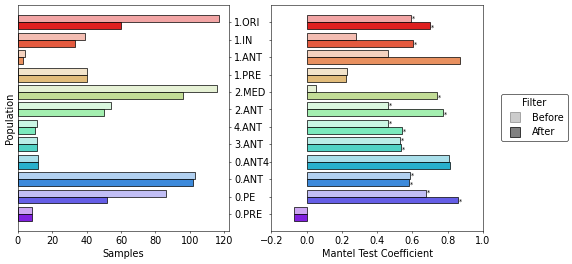

In [52]:
# ---------------------------------------
# PLOT SETUP
FONTSIZE=14
plt.rc('font', size=FONTSIZE)
DPI=50
FIGSIZE=[12,6]

fig, axes = plt.subplots(1, 2, dpi=DPI, figsize=FIGSIZE, gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.subplots_adjust(wspace=0.2)

ax = axes[0]

patch_i = 0
for population in population_order:
    df = mantel_df[(mantel_df["population"] == population)]

    sns.barplot(
        ax=ax,
        data=df,
        y="population",
        x="n",
        hue="status",
        order=population_order,
        palette=[colors_dict[population]],
        edgecolor="black",
        lw="1",
    )
    
    # Set alpha of first rectangle
    rect = ax.patches[patch_i]
    patch_i += 25
    fc = list(rect.get_facecolor())
    fc[3] = 0.40
    rect.set_facecolor(fc)    

ax.yaxis.tick_right()
ax.set_ylabel("Population")
ax.set_xlabel("Samples")

ax.get_legend().remove()

#--------------------------------
# Isolation By Distance
ax = axes[1]

patch_i = 0
for population in population_order:
    
    df = mantel_df[(mantel_df["population"] == population)]

    sns.barplot(
        ax=ax,
        data=df,
        y="population",
        x="coefficient",
        hue="status",
        order=population_order,
        palette=[colors_dict[population]],
        edgecolor="black",
        lw="1",
    )
    
    # Set alpha of first rectangle
    rect = ax.patches[patch_i]
    patch_i += 25
    fc = list(rect.get_facecolor())
    fc[3] = 0.40
    rect.set_facecolor(fc)

# Sig stars

y_frac = 0.5
y_coord = -0.20
x_buff = 0.005
for population in population_order:    
    for status in ["Before", "After"]:
        df = mantel_df[(mantel_df["population"] == population) & (mantel_df["status"] == status)]
        x_coord = list(df["coefficient"])[0]
        reject = list(df["joint_reject"])[0]
        sig=""
        if reject:
            sig="*"
        if x_coord < 0: 
            ha="right"
            x_coord -= x_buff
        else:
            x_coord += x_buff
            ha="left"


        ax.annotate(
            (sig),
            xy=(x_coord, y_coord),
            xycoords="data",
            size=5,
            ha=ha,
            va="center",
            fontsize=FONTSIZE-5,        
        )
        y_coord += y_frac  


ax.set_xlabel("Mantel Test Coefficient")
ax.set_ylabel("")

ax.get_legend().remove()
status_labels = ["Before", "After"]
status_lines = [
    lines.Line2D([0], [0], color="grey", alpha=0.4, lw=0, markersize=15, markeredgecolor="black", markeredgewidth=1, marker="s"),
    lines.Line2D([0], [0], color="grey", lw=0, markersize=15, markeredgecolor="black", markeredgewidth=1, marker="s"),
]

status_legend = fig.legend(
    status_lines, 
    status_labels,
    bbox_to_anchor=(1.05,0.6), title="Filter",
    edgecolor="black",
    )

ax.set_xlim(-0.2, 1.0)
ax.set_ylim(len(population_order), 0 - 1 )

out_path = os.path.join(out_dir, "mantel_comparison_barplot")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")